# <center><font color="black"><font style = "font-family:Bookman Old Style"><font size=6> <ins>**Bike Sharing Assignment**
    
<center><b>By - Shivam Sharma<br>Dsc43</b>

### Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

### Business Goal:

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

#### Import Necessary Libraries:

In [1]:
import pandas as pd               # For Data reading and manipulation and cleaning
import numpy as np                # For arrays and calculations
import matplotlib.pyplot as plt   # For Data visualization
import seaborn as sns             # For Data visualization


import sklearn
from sklearn.preprocessing import MinMaxScaler        # For rescaling
from sklearn.model_selection import train_test_split  # For splitting data in to train & test
from sklearn.linear_model import LinearRegression     # For creating linear regression models 


import statsmodels.api as sm                                                 # For creating OLS models
from statsmodels.stats.outliers_influence import variance_inflation_factor   # For VIF
from sklearn.feature_selection import RFE                                    # For Significant features Selection



# For supress warnings
import warnings
warnings.filterwarnings('ignore')

#Jupyter view setting
pd.set_option("display.max_columns",None)

## Data Reading & Understanding

In [2]:
bike = pd.read_csv(r"C:\Users\HP\Desktop\bike sharing\day.csv", parse_dates = [1])
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Shape of the data
bike.shape

(730, 16)

In [4]:
# Checking the Data types of columns
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [5]:
# Missing Values
bike.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Dropping Unwanted columns : 
 - Instant column is just serial number of the rows so we will not consider this column
 - dteday column we are not using in our analysis, as we have separate column for month and year in the data
 - casual and registered column having count of separate users bikes, here our goal is to predict total count of rental     bikes so we will ignore these columns.

In [7]:
bike_1 = bike.drop(['dteday','instant','casual','registered'],axis=1)
bike_1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


#### Checking some columns and their value counts

In [8]:
# column season
bike_1.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [9]:
# column yr
bike_1.yr.value_counts()

0    365
1    365
Name: yr, dtype: int64

In [10]:
# column mnth
bike_1.mnth.value_counts().sort_index()

1     62
2     56
3     62
4     60
5     62
6     60
7     62
8     62
9     60
10    62
11    60
12    62
Name: mnth, dtype: int64

In [11]:
#column weekday
bike_1.weekday.value_counts()

1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: weekday, dtype: int64

In [12]:
#column weathersit
bike_1.weathersit.value_counts().sort_index()

1    463
2    246
3     21
Name: weathersit, dtype: int64

**Insight:**
 - There are some columns whose original values is already replaced with numeric values
     - **`season`**     - season (1:spring, 2:summer, 3:fall, 4:winter)
     - **`yr`**         - year (0: 2018, 1:2019)
     - **`mnth`**       - month ( 1 to 12)
     - **`weekday`**    - 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat
     - **`weathersit`** - 1:Clear, 2:Misty, 3:Light_RainSnow 4:Heavy_RainSnow
 - **Before we go further let's convert these columns values with their original values for data understanding.**

In [13]:
bike_1.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
bike_1.yr.replace((0,1), ('2018','2019'), inplace=True)
bike_1.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12), ('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
bike_1.weekday.replace((0,1,2,3,4,5,6), ('Sun','Mon','Tue','Wed','Thu','Fri','Sat'), inplace=True)
bike_1.weathersit.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)

In [14]:
bike_1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,2018,Jan,0,Mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,Spring,2018,Jan,0,Tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,Spring,2018,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,2018,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,2018,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


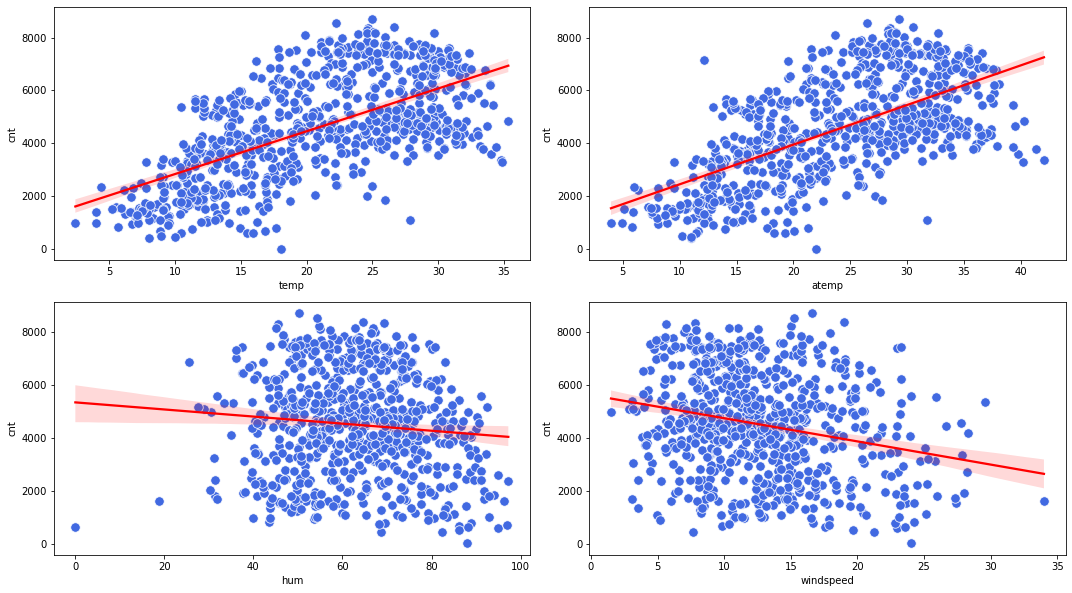

In [15]:
# Visualizing numerical variables linear relation with target feature
num_col = ['temp', 'atemp', 'hum', 'windspeed']

plt.figure(figsize = (15,12))
for i,j in enumerate(num_col):
    plt.subplot(len(num_col)//2 +1,2,i+1)
    sns.scatterplot(y='cnt' , x=j , data=bike_1 , s = 90, color='royalblue')
    sns.regplot(y='cnt' , x=j , data=bike_1 , scatter=False, color = 'red')
plt.tight_layout()

<b>Insight : 

 - columns 'atemp' & 'temp' is having positive linear relation with target column 'count'
 - columns 'hum' & 'windspeed' is having negative linear relation with target column 'count'

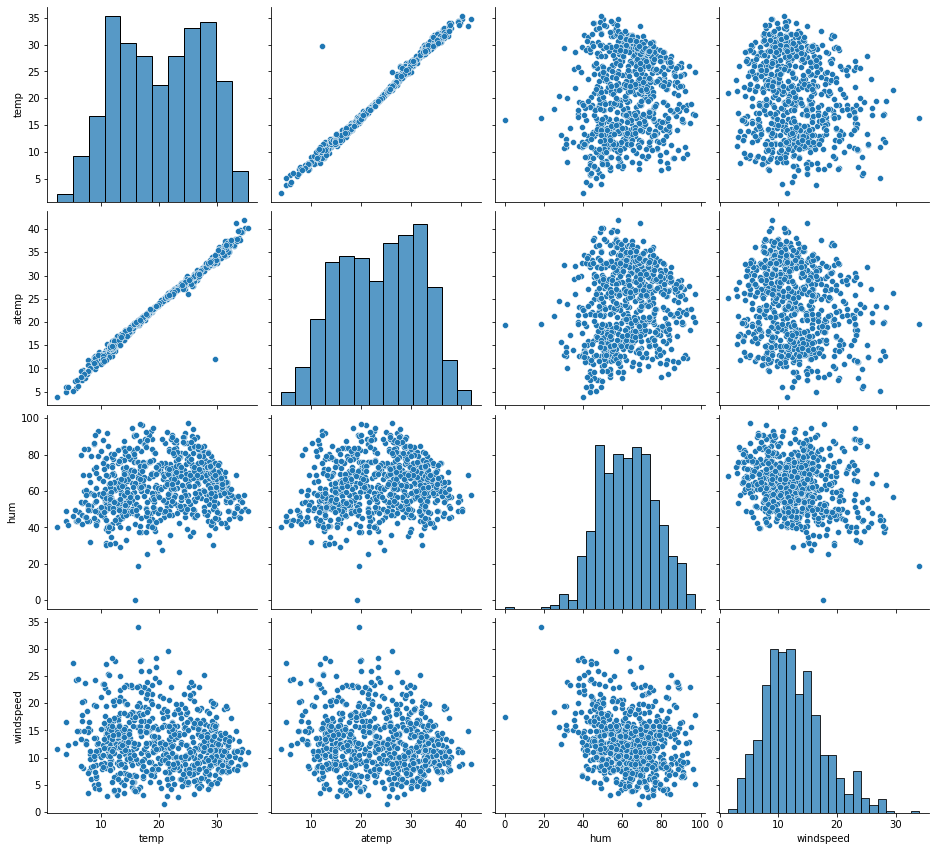

In [16]:
# Visualizing numerical variables correlation with each other:
sns.pairplot(bike_1[num_col],aspect=1.1,height=3)
plt.show()

#### Correlation between numeric variables using heat map

  level_0    level_1         0
0    temp      atemp  0.991696
1     hum  windspeed  0.248506
2   atemp  windspeed  0.183876
3    temp  windspeed  0.158186
4   atemp        hum  0.141512
5    temp        hum  0.128565


<AxesSubplot:>

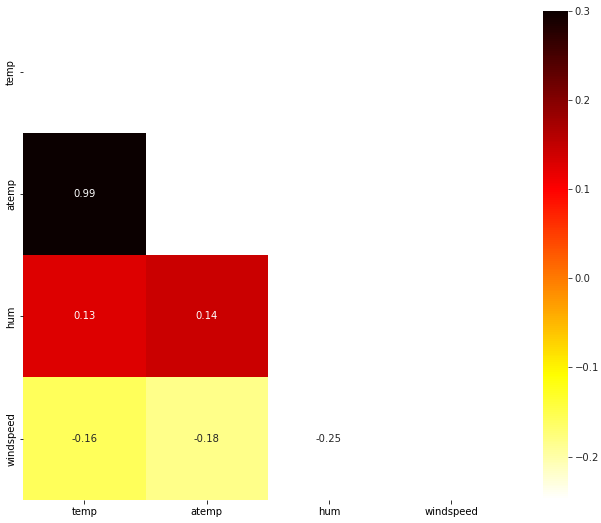

In [17]:
def correlation(df,annot=True,figsize=(11,9)):
    # Percentage of correlation between numerical variables
    corr_1 = df.corr().abs()
    corr_1 = corr_1.unstack().sort_values(kind="quicksort")
    corr_1 = corr_1.dropna()
    corr_1 = corr_1[corr_1 != 1.0].sort_values(ascending=False)
    print(corr_1.reset_index().drop_duplicates(subset=0,keep="first").reset_index().drop("index",axis=1).head(30))
    # Correation using heat map
    import numpy as np
    corr = df.corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    f, ax = plt.subplots(figsize=figsize)
    with sns.axes_style("white"):
        ax = sns.heatmap(corr, annot=annot, mask=mask, vmax=.3, square=True, cbar = True, cmap='hot_r')
    return ax
correlation(bike_1[num_col])

**INSIGHT:**
 - As we can see above column **`temp`** & **`atemp`** is having linear correation between each other
 - Other columns are not sharing any high correlation between each other

### Visualizing Categorical Variables
 - Visualizing caegorical variables with target column **`cnt`** using box plot

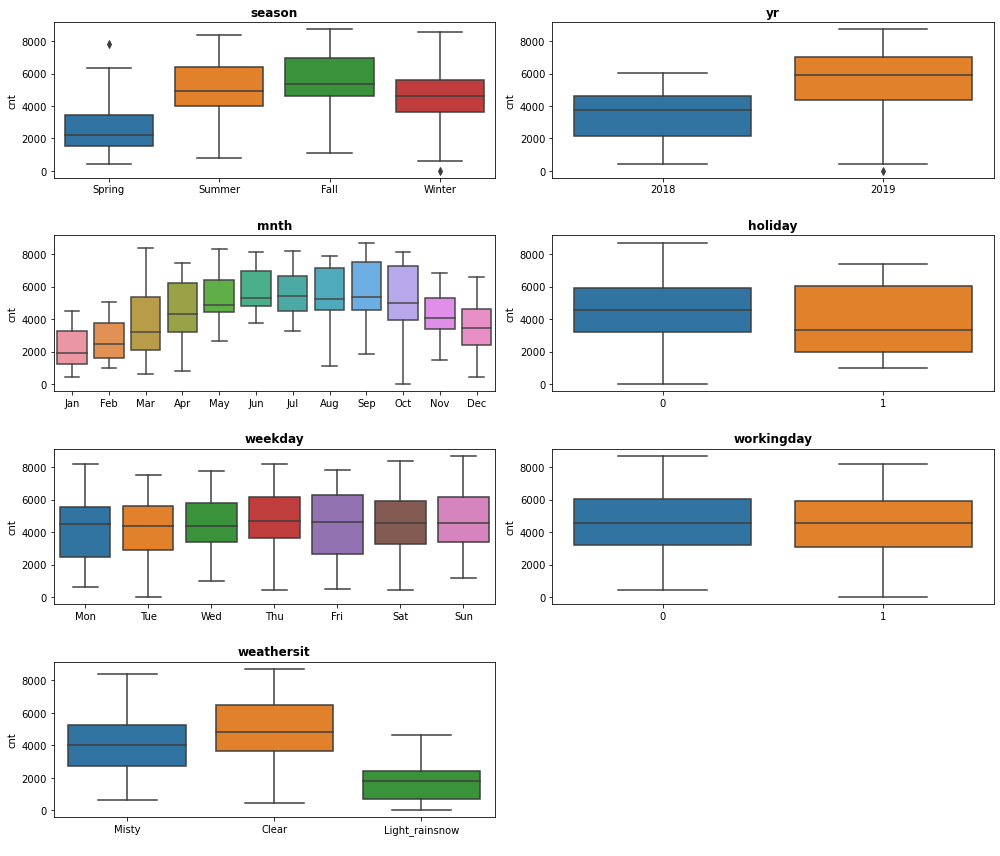

In [18]:
cat_col = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
           'weathersit']

plt.figure(figsize = (14,12))
for i,j in enumerate(cat_col):
    plt.subplot(len(cat_col)//2 +1,2,i+1)
    sns.boxplot(x = j, y = 'cnt', data = bike_1)
    plt.title(j,weight='bold')
    plt.xlabel(" ")
plt.tight_layout()

**INSIGHT:**
 - write........
 - write........

### DATA PREPARATION
 - As we can see data is having some categorical object columns <b>`season`,`yr`,`mnth`,`weekday`,`weathersit`</b>
 - Before modelling we will first convert object columns in dummy variables

#### Let's create dummy variables 
 - Columns - <b>`season`,`yr`,`mnth`,`weekday`,`weathersit`</b>

In [19]:
cat_data = bike_1.select_dtypes(include='object')
bike_1_dummy = pd.get_dummies(cat_data,drop_first=True)

In [20]:
bike_1_dummy.head()

,season_Spring,season_Summer,season_Winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light_rainsnow,weathersit_Misty
0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
bike_2 = pd.concat([bike_1,bike_1_dummy],axis=1)
bike_2.drop(['season','yr','mnth','weekday','weathersit'],axis=1,inplace=True)
bike_2.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light_rainsnow,weathersit_Misty
0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
bike_2.shape

(730, 30)

### DATA SPLITTING IN TRAIN & TEST SETS
 - Before modelling we will first split the data in to train(0.8) & test(0.2) 

In [23]:
# Splitting the data in Train test
bike_train,bike_test = train_test_split(bike_2,train_size=0.7,test_size=0.3,random_state=100)

In [24]:
print('Shape of Train data :',bike_train.shape)
print('Shape of Test data  :',bike_test.shape)

Shape of Train data : (510, 30)
Shape of Test data  : (219, 30)


### Preprocessing / Rescalling
 - Here we will rescale the data using **`Minmax scaler`**
 - For train data we will use **`fit_transform`** to learn the model
 - For test data we will use **`transform`** only because we dont want to learn the model from test data

In [25]:
scaler = MinMaxScaler()

In [26]:
bike_train_scale = bike_train.copy()
bike_test_scale  = bike_test.copy()

In [27]:
bike_train_scale[bike_train_scale.columns] = scaler.fit_transform(bike_train_scale)
bike_test_scale[bike_test_scale.columns]   = scaler.transform(bike_test_scale)

In [28]:
bike_train_scale.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light_rainsnow,weathersit_Misty
653,0.0,1.0,0.509887,0.501133,0.575354,0.300794,0.864243,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
576,0.0,1.0,0.815169,0.766351,0.725633,0.264686,0.827658,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
426,0.0,0.0,0.442393,0.438975,0.640189,0.255342,0.465255,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
728,0.0,1.0,0.245101,0.200348,0.498067,0.663106,0.204096,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
482,0.0,0.0,0.395666,0.391735,0.504508,0.188475,0.482973,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [29]:
y_train = bike_train_scale.pop('cnt')
y_test  = bike_test_scale.pop('cnt')
X_train = bike_train_scale
X_test  = bike_test_scale

##### Correlation between independent variables in train data after split

          level_0           level_1         0
0            temp             atemp  0.989537
1      workingday       weekday_Sun  0.626783
2   season_Spring             atemp  0.610741
3            temp     season_Spring  0.605988
4     weekday_Sat        workingday  0.605864
5        mnth_Jan     season_Spring  0.548861
6        mnth_Nov     season_Winter  0.533619
7        mnth_May     season_Summer  0.532539
8             hum  weathersit_Misty  0.481042
9   season_Spring          mnth_Feb  0.471540
10       mnth_Jan             atemp  0.450832
11           temp          mnth_Jan  0.446724
12       mnth_Jul              temp  0.413929
13       mnth_Jul             atemp  0.407105
14           temp          mnth_Aug  0.387456
15       mnth_Aug             atemp  0.360025
16  season_Winter     season_Summer  0.328116
17  season_Spring     season_Winter  0.326377
18  season_Spring     season_Summer  0.322955
19  season_Winter          mnth_Dec  0.314816
20  season_Spring          mnth_Ma

<AxesSubplot:>

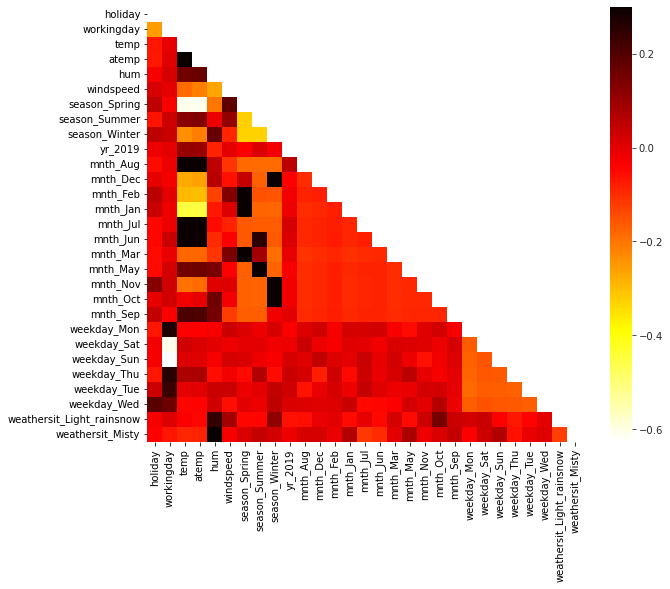

In [30]:
correlation(X_train,annot=False,figsize=(10,8))

# Model building & Evaluation

## MODEL
 - First model building using all features

In [31]:
#Adding constant to the X_train and X_test
X_train_sm = sm.add_constant(X_train)
X_test_sm  = sm.add_constant(X_test)

In [32]:
# Model
lr_model = sm.OLS(y_train,X_train_sm).fit()
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     94.48
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          4.09e-178
Time:                        20:44:28   Log-Likelihood:                 523.87
No. Observations:                 510   AIC:                            -987.7
Df Residuals:                     480   BIC:                            -860.7
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

#### Insight:
 - As we can see above that the model is having Rsquared 0.85 & Adj-Rsquared 0.84
 - Many of the variable's p-value > 0.05
 - We need to modify this model and eliminate non significant variables from the model

## Model Making Using RFE - Recursive Feature Elimination
 - Using RFE & iterative method we will find minimum count of significant columns out of 29 independent variable to make a best model.
 - Comparing their R-squared and adjusted R-square to find out  columns

In [33]:
# Function to find all Rsquared and adj-Rsquared for all possibilities in RFE
def top_rfe(X_train,y_train):
    top_var = []
    rsquared = []
    rsquared_adj = []
    highVIF_col = []
    vif1 = []
    lr = LinearRegression() 
    for col in range(2,X_train.shape[1]+1):
        rfe = RFE(lr,col)
        rfe.fit(X_train, y_train)
        rfe_col = X_train.columns[rfe.support_]
        x_train = X_train[rfe_col]

        # Adding constant to train data:
        x_train = sm.add_constant(x_train)

        # Fitting the model with 15 variables
        lr_model2 = sm.OLS(y_train,x_train).fit()
        
        # VIF
        x = x_train.drop('const',axis=1)
        vif = [(x.columns[i],round(variance_inflation_factor(x.values, i),2)) for i in range(x.shape[1])]
        vif.sort(key = lambda x: x[1],reverse = True)
        
        top_var.append(col)
        rsquared.append(round(lr_model2.rsquared * 100,2))
        rsquared_adj.append(round(lr_model2.rsquared_adj *100,2))
        highVIF_col.append(vif[0][0])
        vif1.append(vif[0][1])
        
        
    df = pd.DataFrame({'top_var':top_var,'R-squared':rsquared,'Adj R-squared':rsquared_adj,'high VIF col':highVIF_col,'VIF':vif1})
        
    return df.set_index('top_var')

# Calling top_rfe function:
top_rfe(X_train,y_train)
#df.style.apply(lambda x: ['background: lightgreen' if (x.top_var in [7,11]) else '' for i in x], axis=1).hide_index()

,R-squared,Adj R-squared,high VIF col,VIF
top_var,,,,
2,44.03,43.81,temp,6.00
3,47.30,46.99,hum,7.79
4,73.36,73.15,hum,7.88
5,74.94,74.69,hum,8.16
6,80.41,80.18,hum,9.73
7,81.32,81.06,hum,10.47
8,81.61,81.32,hum,10.49
9,82.48,82.17,hum,15.14
10,82.96,82.61,hum,15.18


#### Insight:
As we can see that the minimum 7 columns in RFE will give us around 81% Rsquare & Adj-Rsquare and Selecting minimum 11 columns in RFE will give us around 83% Rsquare & Adj-Rsquare. Also In top 7 and 11 columns the VIF for 'hum' column is very high. So, we will first drop the column 'hum' and check again.

##### Dropping the `hum` column and check R, Adj-R & VIF for Top RFE features

In [34]:
# Drop the hum column:
X_train1 = X_train.drop(['hum'],axis=1)

# Calling Top_RFE function again:
top_rfe(X_train1,y_train)
# df.style.apply(lambda x: ['background: lightgreen' if (x.top_var in [7,11]) else '' for i in x], axis=1).hide_index()

,R-squared,Adj R-squared,high VIF col,VIF
top_var,,,,
2,69.03,68.90,temp,1.89
3,72.04,71.88,temp,1.92
4,73.78,73.58,temp,3.06
5,78.74,78.53,windspeed,3.63
6,79.00,78.75,windspeed,3.64
7,79.60,79.32,temp,3.95
8,82.38,82.10,temp,4.20
9,82.80,82.49,temp,4.60
10,83.29,82.95,temp,4.60


#### Insight:
 - Above RFE top 6 columns have appx. 79% Rsquared & Adj-Rsquared also VIF below 5 after removing the `hum` column.
 - Above RFE top 10 columns have appx. 83% Rsquared & Adj-Rsquared also VIF below 5 after removing the `hum` column.

## MODEL 1
##### Model Building and Evaluation Using Top 6 RFE Features
 - Using X_train1 because the High VIF 'hum' column is already dropped above from the data

In [35]:
# RFE with 6 features
lr = LinearRegression() 
rfe6 = RFE(lr,6)

# Fit with 6 features
rfe6.fit(X_train1, y_train)
rfe6_col = X_train1.columns[rfe6.support_]
rfe6_col

Index(['holiday', 'temp', 'windspeed', 'season_Spring', 'yr_2019',
       'weathersit_Light_rainsnow'],
      dtype='object')

In [36]:
# Subsetting train data for 6 selected columns
X_train6 = X_train1[rfe6_col]

# Adding constant to train data:
X_train6 = sm.add_constant(X_train6)

# Fitting the model with 6 variables
lr_model1 = sm.OLS(y_train,X_train6).fit()
print(lr_model1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     315.3
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          7.11e-167
Time:                        20:44:36   Log-Likelihood:                 436.45
No. Observations:                 510   AIC:                            -858.9
Df Residuals:                     503   BIC:                            -829.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [37]:
# Checking the VIF of Model-1 features
vif = pd.DataFrame()
x = X_train6.drop(['const'] , axis = 1)
vif['Features'] = x.columns
vif['VIF'] = [round(variance_inflation_factor(x.values, i),2) for i in range(x.shape[1])]
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.64
1,temp,3.37
4,yr_2019,2.02
3,season_Spring,1.50
5,weathersit_Light_rainsnow,1.05
0,holiday,1.03


#### Insight:
 - Model-1 with 6 features have 79% Rsquared & 78.7% Adj-Rsquared
 - Model-1 with 6 features have all columns with pvalue < 0.05
 - Model-1 with 6 features have all columns with VIF < 5

## Model 2 
##### Model building & evaluation using RFE top 10 columns
 - Using X_train1 data because the High VIF 'hum' column is already dropped above from the data

In [38]:
# RFE with 10 features
lr = LinearRegression() 
rfe10 = RFE(lr,10)

# Fit with 10 features
rfe10.fit(X_train1, y_train)
rfe10_col = X_train1.columns[rfe10.support_]
rfe10_col

Index(['holiday', 'temp', 'windspeed', 'season_Spring', 'season_Winter',
       'yr_2019', 'mnth_Jul', 'mnth_Sep', 'weathersit_Light_rainsnow',
       'weathersit_Misty'],
      dtype='object')

In [39]:
# Subsetting train data for 10 selected columns
X_train10 = X_train[rfe10_col]

# Adding constant to train data:
X_train10 = sm.add_constant(X_train10)

# Fitting the model with 10 variables
lr_model2 = sm.OLS(y_train,X_train10).fit()
print(lr_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.7
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          1.16e-186
Time:                        20:44:36   Log-Likelihood:                 494.70
No. Observations:                 510   AIC:                            -967.4
Df Residuals:                     499   BIC:                            -920.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [40]:
# Checking the VIF of Model-1 features
vif = pd.DataFrame()
x = X_train10.drop(['const'] , axis = 1)
vif['Features'] = x.columns
vif['VIF'] = [round(variance_inflation_factor(x.values, i),2) for i in range(x.shape[1])]
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.60
2,windspeed,4.00
5,yr_2019,2.06
3,season_Spring,1.65
9,weathersit_Misty,1.51
4,season_Winter,1.40
6,mnth_Jul,1.35
7,mnth_Sep,1.20
8,weathersit_Light_rainsnow,1.08
0,holiday,1.04


#### Insight:
 - Model-1 with 6 features have 83.3% Rsquared & 83% Adj-Rsquared
 - Model-1 with 6 features have all columns with pvalue < 0.05
 - Model-1 with 6 features have all columns with VIF < 5

_**As we can see above that Model-1(79% R & AdjR) and Model-2((83% R & AdjR)) are having good Rsquared & Adj-Rsquared Score So it is confusing to understand that which model will perform better. So, we will compare Model-1 & Model-2 to find which model will perform good on unseen test or real life dataset.**_

## Residual Analysis
 - Check if the `error terms` between `y_train actual` & `y_train pred` are normally distributed or not

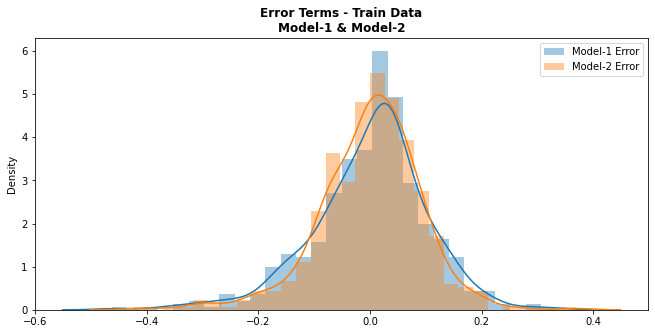

In [41]:
# Making prediction using Model-1 and Model-2
y_train_pred1 = lr_model1.predict(X_train6)
y_train_pred2 = lr_model2.predict(X_train10)

# Comparing error terms of both Model-1 & Model-2 using distplot
plt.figure(figsize=(11,5))
sns.distplot(y_train-y_train_pred1,label='Model-1 Error')
sns.distplot(y_train-y_train_pred2,label='Model-2 Error')
plt.title("Error Terms - Train Data\nModel-1 & Model-2",weight='bold')
plt.legend()
plt.show()

#### Insight:
 - If we see the curves above both models errors terms are somewhat same and are normally distributed
 - Model-2 error terms are more normally distributed than Model-1 error terms.

##### Comparing `y_train actual` values v/s `y_train predicted` values for Model-1 & Model-2

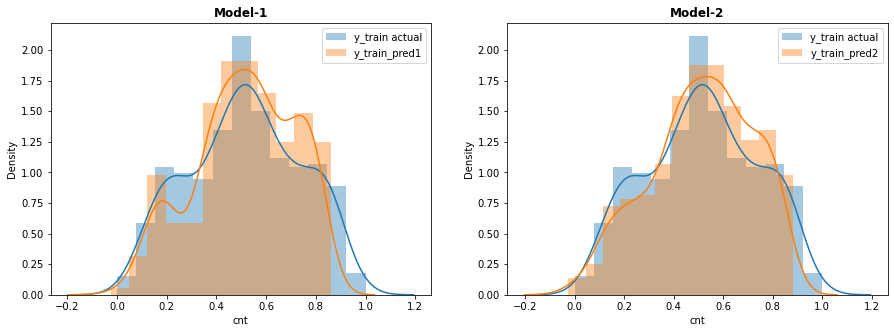

In [42]:
plt.figure(figsize=(15,5))
# Plotting y_train actual v/s y_train predicted for Model-1
plt.subplot(1,2,1)
sns.distplot(y_train,label='y_train actual')
sns.distplot(y_train_pred1,label='y_train_pred1')
plt.title("Model-1",weight='bold')
plt.legend()

# Plotting y_train actual v/s y_train predicted for Model-2
plt.subplot(1,2,2)
sns.distplot(y_train,label='y_train actual')
sns.distplot(y_train_pred2,label='y_train_pred2')
plt.title("Model-2",weight='bold')
plt.legend()
plt.show()

#### Insight:
 - As we can see above that both graphs are looking same but the `predicted target` values with `actual target` values for `Model-2` is more close than the `Model-1`

##### Checking linear relation between Y_train actual   and   Y_train predicted

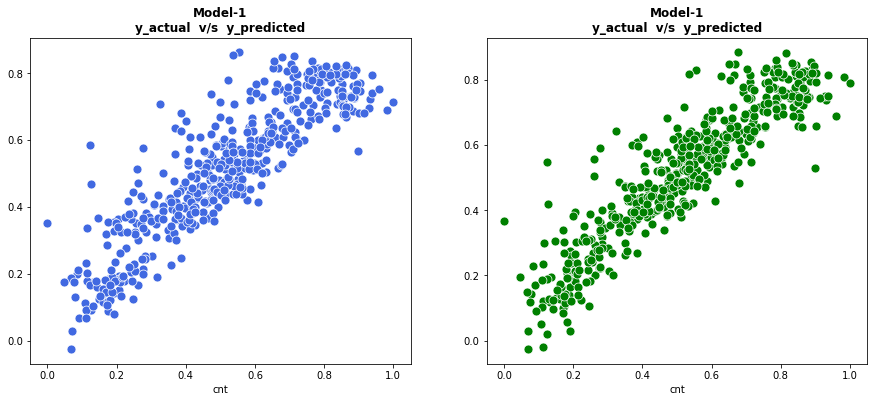

In [43]:
def lr_actual_pred(y_actual,y_pred,color="royalblue"):
    sns.scatterplot(y_actual,y_pred,s=80,color=color)
    plt.title(f'Model-1\ny_actual  v/s  y_predicted',weight='bold')

# Calling function
plt.figure(figsize=(15,6))
plt.subplot(121)
lr_actual_pred(y_train,y_train_pred1,color="royalblue")
plt.subplot(122)
lr_actual_pred(y_train,y_train_pred2,color="green")

## Predicting Test Data
 - Now we will apply our both Model-1 & Model-2 on `X_test` data for prediction and see which one is predicting better

In [44]:
# Note : We have already scaled the test data above
# Adding constant to X_test_sm data
# Predicting target using Model-1 (model with 6 columns)
X_test6 = sm.add_constant(X_test_sm[rfe6_col])
y_test_pred1 = lr_model1.predict(X_test6)

# Adding constant to X_test_sm data
# Predicting target using Model-1 (model with 10 columns)
X_test10 = sm.add_constant(X_test_sm[rfe10_col])
y_test_pred2 = lr_model2.predict(X_test10)

### Residual Analysis On Test Data

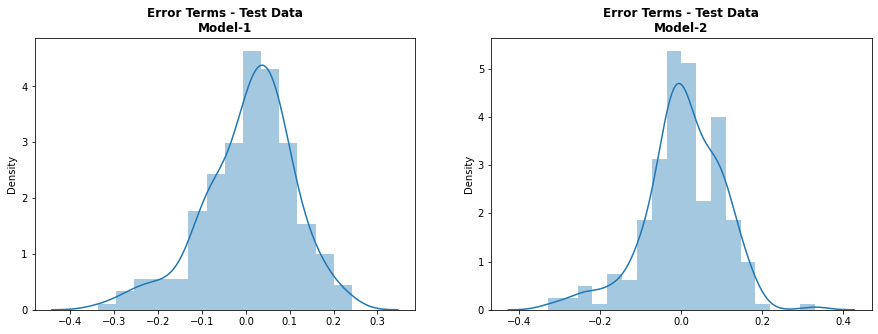

In [45]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot(y_test-y_test_pred1)
plt.title('Error Terms - Test Data\nModel-1',weight='bold')
plt.subplot(122)
sns.distplot(y_test-y_test_pred2)
plt.title('Error Terms - Test Data\nModel-2',weight='bold')
plt.show()

#### Insight:
 - Test data error terms for both the models are `Normally disributed`

### Constant Variance - homoscedasticity

Text(0.5, 1.0, 'homoscedasticity Model-2')

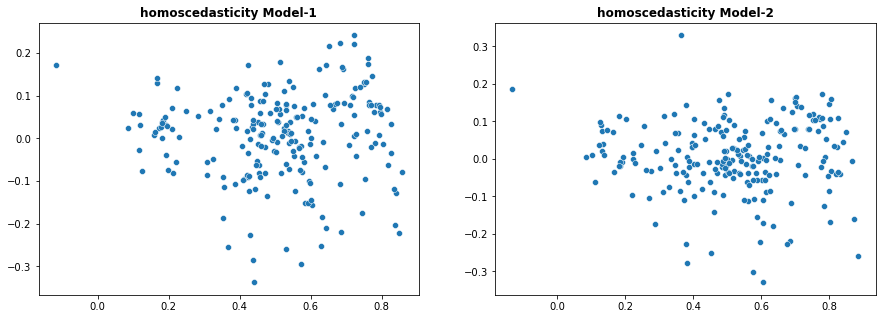

In [46]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.scatterplot(y_test_pred1,y_test-y_test_pred1)
plt.title('homoscedasticity Model-1',weight='bold')
plt.subplot(122)
sns.scatterplot(y_test_pred2,y_test-y_test_pred2)
plt.title('homoscedasticity Model-2',weight='bold')

#### Insight:
 - As we can see above that the data points between Residuals(on y-axis) & fitted values(y_pred on x-axis) are randomly distributed(That means there is violation of homoscedasticity assumption) and we can not see any pattern in them, also at the end the data points are some wider but that's okay we can continue with these models

##### Comparing `y_test actual` v/s `y_test predicted` for Model-1 & Model-2

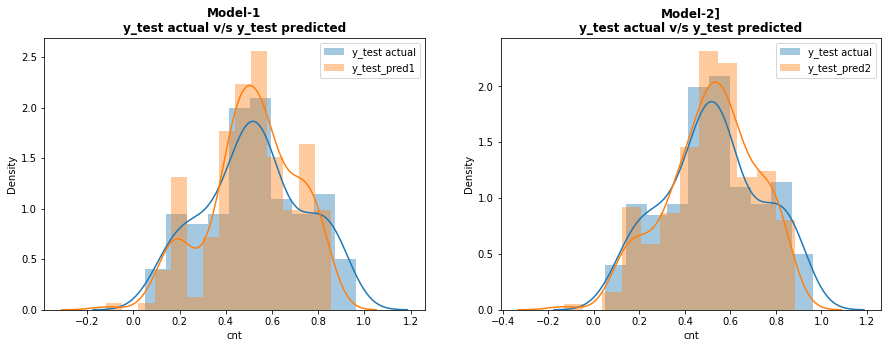

In [47]:
plt.figure(figsize=(15,5))
# Plotting y_train actual v/s y_train predicted for Model-1
plt.subplot(1,2,1)
sns.distplot(y_test,label='y_test actual')
sns.distplot(y_test_pred1,label='y_test_pred1')
plt.title("Model-1\ny_test actual v/s y_test predicted",weight='bold')
plt.legend()

# Plotting y_train actual v/s y_train predicted for Model-2
plt.subplot(1,2,2)
sns.distplot(y_test,label='y_test actual')
sns.distplot(y_test_pred2,label='y_test_pred2')
plt.title("Model-2]\ny_test actual v/s y_test predicted",weight='bold')
plt.legend()
plt.show()

#### Insight:
 - For both models curve of predicted values are closer to actual target values, but for model-2 the curve is little bit more closer than the Model-1.
 - Both the models with Model-1(6 columns) & Model-2(10 columns) are predicting target values approximately same on unseen data.

##### Checking Linear relation b/w `Y_test actual` and `Y_test_pred`

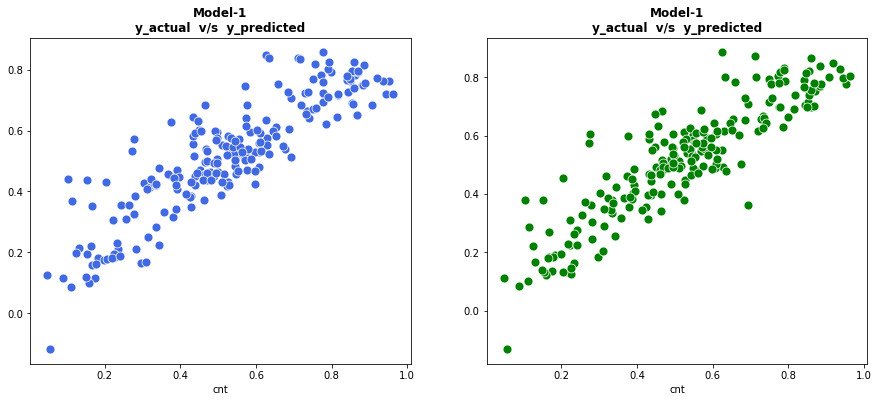

In [48]:
plt.figure(figsize=(15,6))
plt.subplot(121)
lr_actual_pred(y_test,y_test_pred1)
plt.subplot(122)
lr_actual_pred(y_test,y_test_pred2,color="green")

#### Insight:
 - In above scatter plots we can see that both models data points having linear positive slope and are approximately spreaded in same pattern but Model-2 data points are little bit more closer with each other and uniformly spreaded than the model-1 data points

### Rsquared & Adj-Rsquared
 - Comparing train-test Rsquared & Adj-Rsquared for Model-1 and Model-2

In [49]:
from sklearn.metrics import r2_score
# Rsquared
train_r2_model1 = round(lr_model1.rsquared,2)
test_r2_model1 = round(r2_score(y_test, y_test_pred1),2)
train_r2_model2 = round(lr_model2.rsquared,2)
test_r2_model2 = round(r2_score(y_test, y_test_pred2),2)

# Calculation Adjusted Rsquared
n1, p1 = len(y_test) , X_test6.shape[1]
n2, p2 = len(y_test) , X_test10.shape[1]

train_adjr2_model1 = round(lr_model1.rsquared,2)
test_adjr2_model1 = round(1-(1-train_r2_model1)*(n1-1)/(n1-p1-1),2)
train_adjr2_model2 = round(lr_model2.rsquared,2)
test_adjr2_model2 = round(1-(1-test_r2_model2)*(n2-1)/(n2-p2-1),2)

# Creating dataframe
result = pd.DataFrame({'Model':['Model-1','Model-1','Model-2','Model-2'],
                       'Train/Test':['Train','Test','Train','Test'],
                       'R-squared':[train_r2_model1,test_r2_model1,train_r2_model2,test_r2_model2] ,
                       'Adj-Rsquared':[train_adjr2_model1,test_adjr2_model1,train_adjr2_model2,test_adjr2_model2]})
result.set_index(["Model",'Train/Test'])

R-squared  Adj-Rsquared
Model   Train/Test                         
Model-1 Train            0.79          0.79
        Test             0.78          0.78
Model-2 Train            0.83          0.83
        Test             0.81          0.80

#### Insight & Conclusion:
As we can see above that r2 & adj-r2 of train-test of model-2 are very cose to each other and are equal and above 80%. 

_**Also we have seen above that the test actual values and predicted values are very much close to each other than Model-1 values. So, we are considering model-2 as best model also Model-2 will perform better than Model-1 on real life unseen datasets.**_

### Final Model & Variables
 - We are considering `Model-2` with `10 variables` as best model
 - <b>`Train Rsquared 83%` , `Train Adj-Rsquared 83%` , `Test Rsquared 81%` ,  `Test Adj-Rsquared 80%`

In [50]:
lr_model2.params.sort_values(ascending=False)

temp                         0.451455
const                        0.251899
yr_2019                      0.234092
mnth_Sep                     0.057705
season_Winter                0.047278
mnth_Jul                    -0.072719
weathersit_Misty            -0.081133
holiday                     -0.098556
season_Spring               -0.110795
windspeed                   -0.139817
weathersit_Light_rainsnow   -0.286408
dtype: float64

## Interpretation:
 - This is the most basic model we could devise. 
 - The final predictors appear to have low correlations.
 - As a result, the final model includes the six variables mentioned above.
 - We can see that temperature variable is having the highest coefficient 0.45, which means if the temperature increases by one unit the number of bike rentals increases by 0.45 units.
 - This model can be extended to predict the number of daily bike rentals.